In [3]:
import pymysql
import pandas as pd

from config import DB_CONFIG

# MySQL 연결
conn = pymysql.connect(
    host=DB_CONFIG['host'],
    user=DB_CONFIG['user'],
    password=DB_CONFIG['password'],
    database=DB_CONFIG['database'],
    port=DB_CONFIG['port'],
    charset='utf8mb4'
)

# 🔹 데이터베이스 연결
conn = pymysql.connect(host=DB_HOST, user=DB_USER, password=DB_PASSWORD, database=DB_NAME)

# 🔹 각 테이블에서 데이터 가져오기
queries = {
    "차량 주행음": "SELECT mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13 FROM wav_car_driving_data",
    "차량 경적": "SELECT mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13 FROM wav_car_horn_data",
    "사이렌": "SELECT mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13 FROM wav_car_siren_data",
    "이륜차 주행음": "SELECT mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13 FROM wav_motorcycle_driving_data",
    "이륜차 경적": "SELECT mfcc_1, mfcc_2, mfcc_3, mfcc_4, mfcc_5, mfcc_6, mfcc_7, mfcc_8, mfcc_9, mfcc_10, mfcc_11, mfcc_12, mfcc_13 FROM wav_motorcycle_horn_data"
}

# 🔹 데이터를 불러와서 하나의 DataFrame으로 합치기
df_list = []
for label, query in queries.items():
    temp_df = pd.read_sql(query, conn)
    temp_df["label"] = label  # 라벨 추가
    df_list.append(temp_df)

conn.close()

# 🔹 모든 데이터를 하나의 DataFrame으로 합치기
df = pd.concat(df_list, ignore_index=True)

# 🔹 데이터 확인
print(f"📊 데이터셋 로드 완료! 총 {df.shape[0]}개의 샘플")
print(df.head())  # 데이터 미리보기


/tmp/ipykernel_12743/1641210316.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp_df = pd.read_sql(query, conn)
/tmp/ipykernel_12743/1641210316.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp_df = pd.read_sql(query, conn)
/tmp/ipykernel_12743/1641210316.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp_df = pd.read_sql(query, conn)
/tmp/ipykernel_12743/1641210316.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. 

📊 데이터셋 로드 완료! 총 16156개의 샘플
      mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5    mfcc_6     mfcc_7  \
0 -385.80450  221.88010   0.494683  28.565971  18.829826  7.010790  15.539120   
1 -349.17078  230.95892 -13.999462  24.647718   4.476587 -5.033060   8.570424   
2 -355.54538  218.81427   3.432721  19.502445  16.183168  9.220803  16.275106   
3 -236.12979  221.23744 -29.371033 -10.870239 -11.654756 -0.116196   7.899588   
4 -349.87613  226.83524 -11.460137  20.584920   0.376289 -5.433277   6.240622   

      mfcc_8     mfcc_9    mfcc_10   mfcc_11   mfcc_12   mfcc_13   label  
0  -6.805669   3.307256   0.591342 -0.738809 -4.553777 -6.494684  차량 주행음  
1  -8.308355  10.932405   0.640150 -1.367412  3.048849 -0.461315  차량 주행음  
2  -3.472333   0.711448   2.496453 -1.722168 -0.972728 -7.246366  차량 주행음  
3   4.946808  14.250912  12.530488  5.926374  9.088593  5.821643  차량 주행음  
4 -10.352271   8.571333   2.874433 -3.499928  1.593806  1.176425  차량 주행음  


/tmp/ipykernel_12743/1641210316.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  temp_df = pd.read_sql(query, conn)


✅ 모델 정확도: 0.9112

🎯 분류 리포트:
               precision    recall  f1-score   support

         사이렌       0.98      0.94      0.96       398
      이륜차 경적       0.96      0.94      0.95       912
     이륜차 주행음       0.87      0.95      0.91       947
       차량 경적       0.89      0.88      0.88       638
      차량 주행음       0.86      0.75      0.80       337

    accuracy                           0.91      3232
   macro avg       0.91      0.89      0.90      3232
weighted avg       0.91      0.91      0.91      3232



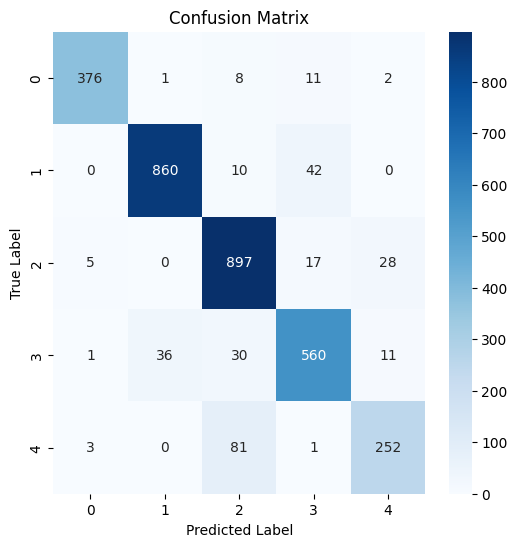

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Feature & Label 설정
features = [f"mfcc_{i}" for i in range(1, 14)]  # MFCC 1~13 사용
X = df[features]  # 입력 데이터
y = df["label"]  # 라벨(소음 유형)

# 🔹 Train / Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 🔹 데이터 정규화 (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🔹 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ 모델 정확도: {accuracy:.4f}")
print("\n🎯 분류 리포트:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix 시각화
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47116 (\N{HANGUL SYLLABLE REN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47452 (\N{HANGUL SYLLABLE RYUN}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.draw()
/home/ubuntu/anaconda3/envs/ml_env/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarni

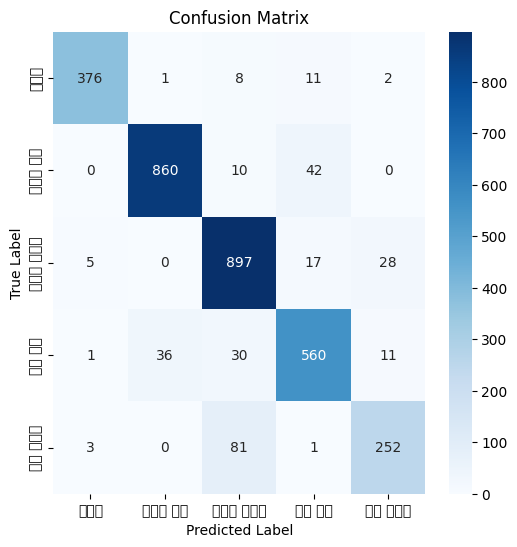

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 🔹 Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)
labels = ["사이렌", "이륜차 경적", "이륜차 주행음", "차량 경적", "차량 주행음"]

# 🔹 Confusion Matrix 시각화
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
